In [83]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage.transform import rescale
from skimage import exposure
from skimage.exposure import equalize_hist
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.filters import median

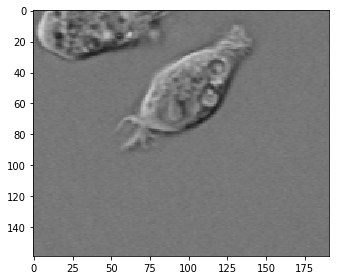

In [7]:
img = imread("cell.tif")
imshow(img)

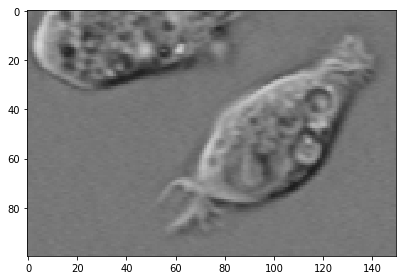

In [11]:
img_cropped = img[0:100, 0:150]
imshow(img_cropped)

Cropping is a lossy operation, which means you will **lose information** from your original image.

## Image Resizing
Use **interpolation** to account for lost pixels when down-scaling or missing pixels when up-scaling.

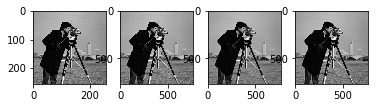

In [89]:
img2 = imread("cameraman.tif")
fix, ax = plt.subplots(1, 4)
ax[0].imshow(img2, cmap = "gray")
ax[1].imshow(rescale(img2, 3, order = 0), cmap = "gray")
ax[2].imshow(rescale(img2, 3, order = 1), cmap = "gray")
ax[3].imshow(rescale(img2, 3, order = 2), cmap = "gray")
plt.show()

# Improving Contrast

## Histogram Stretching 

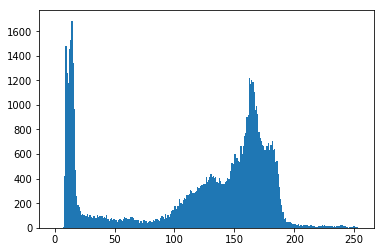

In [91]:
plt.hist(img2.ravel(), bins = range(255))
plt.show()

In [98]:
img_rescale = exposure.rescale_intensity(img2, in_range = (0, 100))

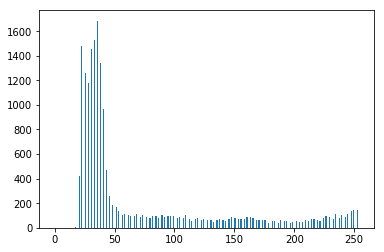

In [61]:
plt.hist(img_rescale.ravel(), bins = range(255))
plt.show()

## Using Intensity Percentiles to Specify Input Range

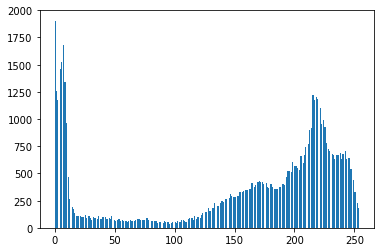

In [52]:
p2, p98 = np.percentile(img2, (2, 98))
img_rescale2 = exposure.rescale_intensity(img2, in_range = (p2, p98))
plt.hist(img_rescale2.ravel(), bins = range(255))
plt.show()

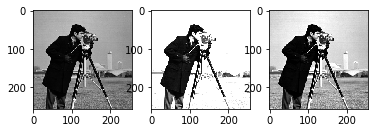

In [63]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img2, cmap = "gray")
ax[1].imshow(img_rescale, cmap = "gray")
ax[2].imshow(img_rescale2, cmap = "gray")

## Histogram Equalization

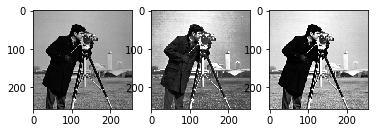

In [74]:
img_eg = equalize_hist(img2)
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img2, cmap = "gray")
# increasing contrast by equalization
ax[1].imshow(img_eg, cmap = "gray")
# increasing contrast by the previous method: rescale_intensity
ax[2].imshow(img_rescale2, cmap = "gray")

## Gaussian Blur Filter

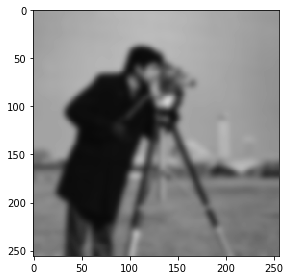

In [79]:
img_blur = gaussian(img2, 3)
imshow(img_blur)

## Sobel Filter

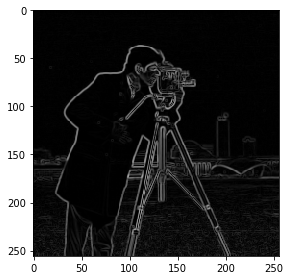

In [82]:
img_edges = sobel(img2)
imshow(img_edges)

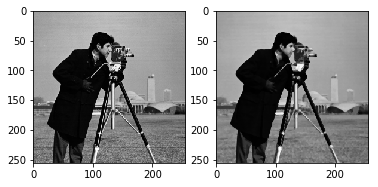

In [87]:
img_med = median(img2, np.ones((3,3)))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img2, cmap = "gray")
ax[1].imshow(img_med, cmap = "gray") # less noise